# MEDIDAS DE ASSIMETRIA

## Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

import requests

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Dataset 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21
0,NaN,Afghanistan,33.939,67.710,0,0,0,0,0,0,...,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517
1,NaN,Albania,41.153,20.168,0,0,0,0,0,0,...,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506
2,NaN,Algeria,28.034,1.660,0,0,0,0,0,0,...,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304
3,NaN,Andorra,42.506,1.522,0,0,0,0,0,0,...,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053
4,NaN,Angola,-11.203,17.874,0,0,0,0,0,0,...,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399
5,NaN,Antigua and Barbuda,17.061,-61.796,0,0,0,0,0,0,...,1080,1080,1103,1122,1122,1128,1136,1136,1136,1147
6,NaN,Argentina,-38.416,-63.617,0,0,0,0,0,0,...,2261577,2269877,2278115,2291051,2301389,2308597,2322611,2332765,2348821,2363251
7,NaN,Armenia,40.069,45.038,0,0,0,0,0,0,...,185020,186184,187441,188446,189540,190317,190741,191491,192639,193736
8,Australian Capital Territory,Australia,-35.474,149.012,0,0,0,0,0,0,...,123,123,123,123,123,123,123,123,123,123
9,New South Wales,Australia,-33.869,151.209,0,0,0,0,3,4,...,5273,5277,5278,5281,5281,5283,5288,5291,5296,5296


In [4]:
# Criando DataFrame com qt. populacao

url = 'https://www.worldometers.info/world-population/population-by-country/'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest" }

r = requests.get(url, headers = header)
pop = pd.read_html(r.text)[0]

pop

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39 %,5540090,153,9388211,-348399.000,1.7,38,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,-532687.000,2.2,28,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,954806.000,1.8,38,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.000,2.3,30,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.000,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,4992,0.06 %,3,50,100,nan,N.A.,N.A.,10 %,0.00 %
231,232,Falkland Islands,3480,3.05 %,103,0,12170,nan,N.A.,N.A.,66 %,0.00 %
232,233,Niue,1626,0.68 %,11,6,260,nan,N.A.,N.A.,46 %,0.00 %
233,234,Tokelau,1357,1.27 %,17,136,10,nan,N.A.,N.A.,0 %,0.00 %


In [5]:
# removendo as colunas de latitude e longitude
df.drop(columns={'Lat', 'Long'}, inplace=True)

# Somando e agrupando por país
df = df.groupby('Country/Region', as_index=False).sum()

In [6]:
# Fazendo o melt no dataframe
df = df.melt(id_vars = 'Country/Region', value_name= 'quantidade', var_name='data')
df

,Country/Region,data,quantidade
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
83707,Vietnam,4/1/21,2617
83708,West Bank and Gaza,4/1/21,244645
83709,Yemen,4/1/21,4531
83710,Zambia,4/1/21,88549


In [7]:
# Alterando o tipo de dado
df['data'] = df['data'].astype('datetime64')

# Ordenando por pais e por data
df = df.sort_values(by=['Country/Region', 'data'])

# Calculando a diferenca
df['dif'] = df.groupby(['Country/Region'])['quantidade'].diff().fillna(0)


In [8]:
# visualizando a diferenca (exemplo do Brasil)
df[df['Country/Region'] == 'Brazil'].head(10)

,Country/Region,data,quantidade,dif
23,Brazil,2020-01-22,0,0.000
215,Brazil,2020-01-23,0,0.000
407,Brazil,2020-01-24,0,0.000
599,Brazil,2020-01-25,0,0.000
791,Brazil,2020-01-26,0,0.000
983,Brazil,2020-01-27,0,0.000
1175,Brazil,2020-01-28,0,0.000
1367,Brazil,2020-01-29,0,0.000
1559,Brazil,2020-01-30,0,0.000
1751,Brazil,2020-01-31,0,0.000


In [9]:
# Verificando se o resultado da diferenca esta correta
df['dif'].sort_values()

77922   -74347.000
55166   -46076.000
14078   -17074.000
18018   -10034.000
44020    -7953.000
           ...    
67954   262622.000
67570   278261.000
67762   293268.000
66610   300308.000
62193   823225.000
Name: dif, Length: 83712, dtype: float64

In [10]:
df.loc[55166]

Country/Region                 France
data              2020-11-04 00:00:00
quantidade                    1593159
dif                        -46076.000
Name: 55166, dtype: object

In [11]:
# Visualizando uma das linhas com erro
df[(df['Country/Region'] == 'France') & (df['data'] > '2020-11-01')]

,Country/Region,data,quantidade,dif
54782,France,2020-11-02,1566634,106091.000
54974,France,2020-11-03,1639235,72601.000
55166,France,2020-11-04,1593159,-46076.000
55358,France,2020-11-05,1650965,57806.000
55550,France,2020-11-06,1711917,60952.000
...,...,...,...,...
82814,France,2021-03-28,4606185,37021.000
83006,France,2021-03-29,4615295,9110.000
83198,France,2021-03-30,4646014,30719.000
83390,France,2021-03-31,4705068,59054.000


In [12]:
# Substituindo os valores negativos por 0
df[df['dif'] < 0] = 0

In [13]:
df['dif'].sort_values()

0            0.000
34658        0.000
34850        0.000
35042        0.000
35234        0.000
           ...    
67954   262622.000
67570   278261.000
67762   293268.000
66610   300308.000
62193   823225.000
Name: dif, Length: 83712, dtype: float64

In [14]:
df.loc[55166]

Country/Region       0
data                 0
quantidade           0
dif              0.000
Name: 55166, dtype: object

In [15]:
# Dataframe com valores '0'
df[df['data'].astype(str).str.isdigit() == 0]

,Country/Region,data,quantidade,dif
0,Afghanistan,2020-01-22 00:00:00,0,0.000
192,Afghanistan,2020-01-23 00:00:00,0,0.000
384,Afghanistan,2020-01-24 00:00:00,0,0.000
576,Afghanistan,2020-01-25 00:00:00,0,0.000
768,Afghanistan,2020-01-26 00:00:00,0,0.000
...,...,...,...,...
82943,Zimbabwe,2021-03-28 00:00:00,36822,4.000
83135,Zimbabwe,2021-03-29 00:00:00,36839,17.000
83327,Zimbabwe,2021-03-30 00:00:00,36839,0.000
83519,Zimbabwe,2021-03-31 00:00:00,36882,43.000


In [16]:
# removendo os dados com valores 0
df = df[df.data != 0]

In [17]:
# Dataframe com valores '0'
df[df['data'].astype(str).str.isdigit() == 0]

,Country/Region,data,quantidade,dif
0,Afghanistan,2020-01-22 00:00:00,0,0.000
192,Afghanistan,2020-01-23 00:00:00,0,0.000
384,Afghanistan,2020-01-24 00:00:00,0,0.000
576,Afghanistan,2020-01-25 00:00:00,0,0.000
768,Afghanistan,2020-01-26 00:00:00,0,0.000
...,...,...,...,...
82943,Zimbabwe,2021-03-28 00:00:00,36822,4.000
83135,Zimbabwe,2021-03-29 00:00:00,36839,17.000
83327,Zimbabwe,2021-03-30 00:00:00,36839,0.000
83519,Zimbabwe,2021-03-31 00:00:00,36882,43.000


In [18]:
# Alterando o tipo de dado da coluna data
df['data'] = df['data'].astype('datetime64')

In [19]:
# renomeando as colunas
df.rename(columns={'Country/Region' : 'country'}, inplace = True)

pop.rename(columns={'Country (or dependency)' : 'country',
                   'Population (2020)' : 'pop'}, inplace = True)

In [20]:
df = df.merge(pop[['country', 'pop']], how = 'left', on ='country')

df.sample(10)

,country,data,quantidade,dif,pop
83652,Zimbabwe,2021-03-31,36882,43.000,14862924.000
13064,Cabo Verde,2021-03-19,16374,76.000,555987.000
63419,Saint Lucia,2020-09-19,27,0.000,183627.000
45767,Madagascar,2020-02-08,0,0.000,27691018.000
44024,Liechtenstein,2020-02-08,0,0.000,38128.000
74716,Tanzania,2020-08-18,509,0.000,59734218.000
28547,Georgia,2020-09-08,1729,45.000,3989167.000
39180,Kazakhstan,2021-03-02,264178,782.000,18776707.000
43293,Liberia,2020-06-28,768,39.000,5057681.000
17318,Congo (Brazzaville),2020-12-04,5774,0.000,nan


In [38]:
br = df[df['country'] == 'Brazil']
nz = df[df['country'] == 'New Zealand']
ch = df[df['country'] == 'China']
jp = df[df['country'] == 'Japan']
po = df[df['country'] == 'Portugal']



In [28]:
# % de infectados por populacao no Brazil
qt_br = br[['data', 'country','dif']].groupby([br['data'].dt.year, br['data'].dt.month]).sum()
qt_br['per_pop'] = qt_br['dif'] / (pop[pop['country'] == 'Brazil']['pop'].values) * 100


In [24]:
# % de infectados por populacao na Nova Zelandia
qt_nz = nz[['data', 'country','dif']].groupby([nz['data'].dt.year, nz['data'].dt.month]).sum()
qt_nz['per_pop'] = qt_nz['dif'] / (pop[pop['country'] == 'New Zealand']['pop'].values) * 100

In [44]:
# % de infectados por populacao na China
qt_ch = ch[['data', 'country','dif']].groupby([ch['data'].dt.year, ch['data'].dt.month]).sum()
qt_ch['per_pop'] = qt_ch['dif'] / (pop[pop['country'] == 'China']['pop'].values) * 100

# % de infectados por populacao em Portugal
qt_po = po[['data', 'country','dif']].groupby([po['data'].dt.year, po['data'].dt.month]).sum()
qt_po['per_pop'] = qt_po['dif'] / (pop[pop['country'] == 'Portugal']['pop'].values) * 100

In [25]:
paises = ['Portugal','United Kingdon','China','Japan','Argentina','Australia','Spain','Brazil','Italy','New Zealand']

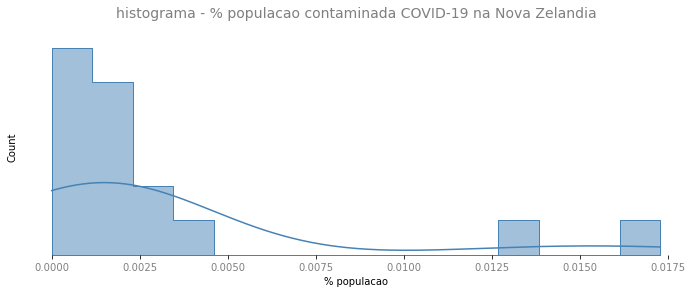

In [26]:
plt.figure(figsize=(12,4))

ax = sns.histplot(data = qt_nz['per_pop'], bins = 15, kde = True, element="step", color = 'steelblue')
plt.title('histograma - % populacao contaminada COVID-19 na Nova Zelandia', fontsize=14, color = 'grey', pad = 20)
sns.despine(bottom= True, left = True)
plt.xticks(fontsize=10, color = 'grey')
plt.yticks([])

plt.xlabel('% populacao')

ax = ax

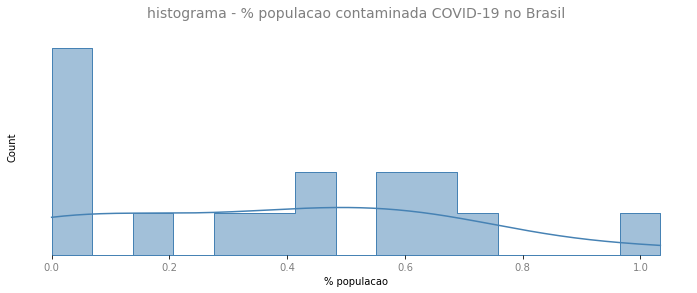

In [29]:
plt.figure(figsize=(12,4))

ax = sns.histplot(data = qt_br['per_pop'], bins = 15, kde = True, element="step", color = 'steelblue')
plt.title('histograma - % populacao contaminada COVID-19 no Brasil', fontsize=14, color = 'grey', pad = 20)
sns.despine(bottom= True, left = True)
plt.xticks(fontsize=10, color = 'grey')
plt.yticks([])

plt.xlabel('% populacao')

ax = ax

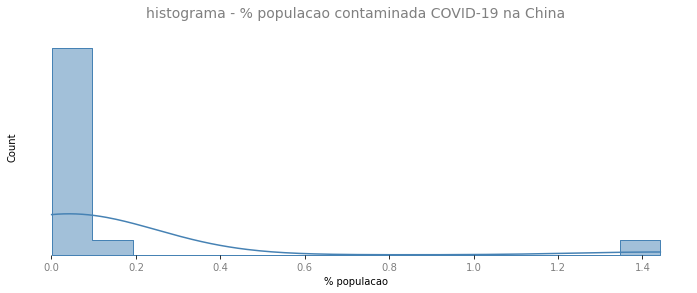

In [40]:
plt.figure(figsize=(12,4))

ax = sns.histplot(data = qt_ch['per_pop'], bins = 15, kde = True, element="step", color = 'steelblue')
plt.title('histograma - % populacao contaminada COVID-19 na China', fontsize=14, color = 'grey', pad = 20)
sns.despine(bottom= True, left = True)
plt.xticks(fontsize=10, color = 'grey')
plt.yticks([])

plt.xlabel('% populacao')

ax = ax

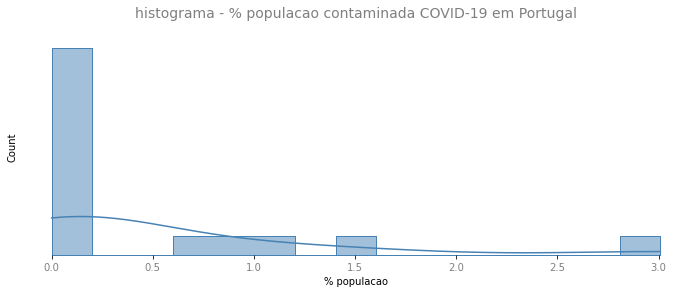

In [46]:
plt.figure(figsize=(12,4))

ax = sns.histplot(data = qt_po['per_pop'], bins = 15, kde = True, element="step", color = 'steelblue')
plt.title('histograma - % populacao contaminada COVID-19 em Portugal', fontsize=14, color = 'grey', pad = 20)
sns.despine(bottom= True, left = True)
plt.xticks(fontsize=10, color = 'grey')
plt.yticks([])

plt.xlabel('% populacao')

ax = ax